<a href="https://colab.research.google.com/github/Sharukevo/HiRise/blob/main/spectra_from_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import requests
url = "https://raw.githubusercontent.com/Sharukevo/HiRise/main/Crater%20on%20Northern%20Plains%20IN%20METERS.jpg"
im = Image.open(requests.get(url, stream=True).raw)
print(im.format, im.size, im.mode)

JPEG (3004, 3004) RGB


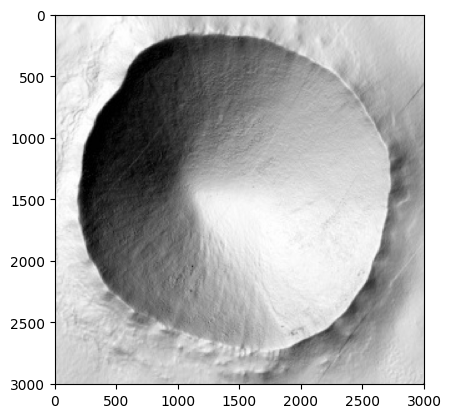

In [ ]:
imgplot = plt.imshow(im)

In [ ]:
imdata = np.array(im, dtype=int)

In [ ]:
imdatax = np.linspace(start=1, stop=im.size[1],num=im.size[1])
print(imdatax)

[1.000e+00 2.000e+00 3.000e+00 ... 3.002e+03 3.003e+03 3.004e+03]


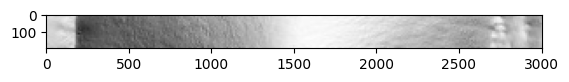

In [ ]:
imdataRot = np.rot90(imdata)
imdataRot = imdataRot[1400:1600:]
imgplot2 = plt.imshow(imdataRot)

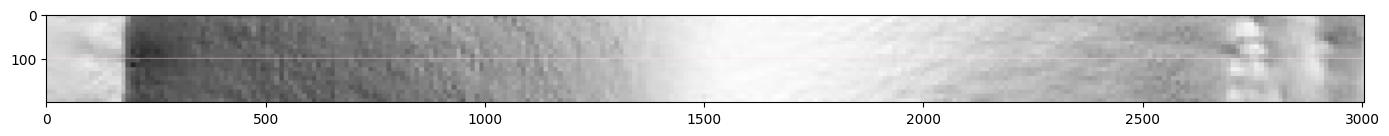

In [ ]:
LineToExtract = 100
imdataRotADDLINE = imdataRot.copy()
imdataRotADDLINE[LineToExtract,:] = [255,225,225] 
plt.figure(figsize=(17, 3))
imgplot2 = plt.imshow(imdataRotADDLINE)

In [ ]:
imdataRED = imdataRot[LineToExtract,:][:,0]
imdataGREEN = imdataRot[LineToExtract,:][:,1]
imdataBLUE = imdataRot[LineToExtract,:][:,2]
imdataAVG = (imdataRED+imdataGREEN+imdataBLUE)

In [ ]:
print(imdataGREEN)

[214 214 213 ... 184 184 184]


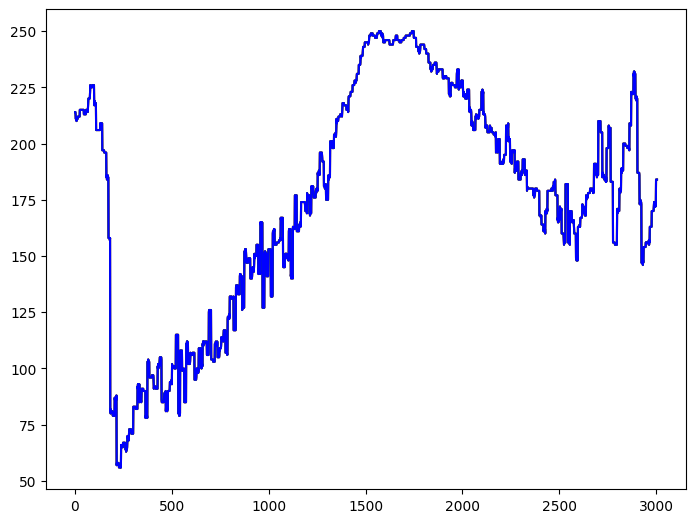

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdatax,imdataRED, color='r', label='Red')
ax.plot(imdatax,imdataGREEN, color='g', label='Green')
ax.plot(imdatax,imdataBLUE, color='b', label='Blue')
plt.show()

In [ ]:
greenPeakPixels = imdataGREEN.argmax()
print(greenPeakPixels)

1568


In [ ]:
redPeakPixels = imdataRED.argmax()
print(redPeakPixels)

1568


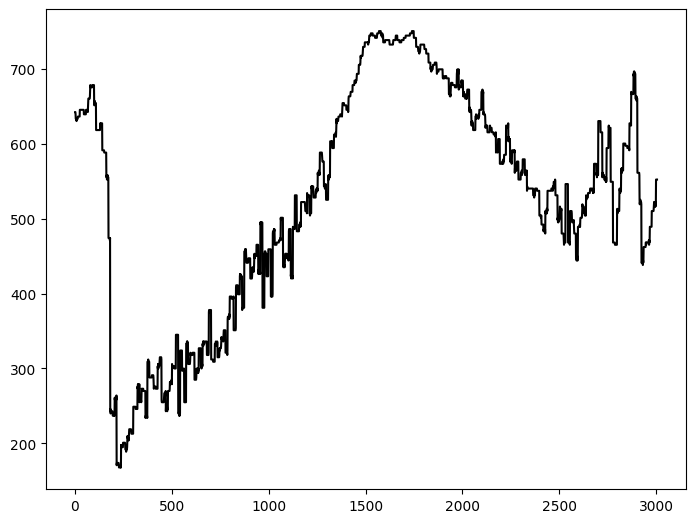

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdatax,imdataAVG, color='k', label='PretendData')

plt.show()

In [ ]:
from scipy.signal import find_peaks

In [ ]:
peaks, _ = find_peaks(imdataAVG, height=600)


In [ ]:
print(peaks)

[  34   60   78   92  100  129  135 1319 1325 1345 1349 1372 1383 1408
 1444 1473 1503 1530 1572 1585 1588 1610 1658 1742 1791 1836 1860 1886
 1899 1911 1931 1933 1935 1943 1971 1973 1976 1979 1981 1993 1998 2004
 2006 2020 2028 2035 2037 2041 2047 2049 2052 2069 2075 2082 2098 2102
 2106 2108 2123 2141 2171 2187 2228 2235 2237 2244 2705 2754 2760 2834
 2864 2870 2882 2884 2886 2897 2900]


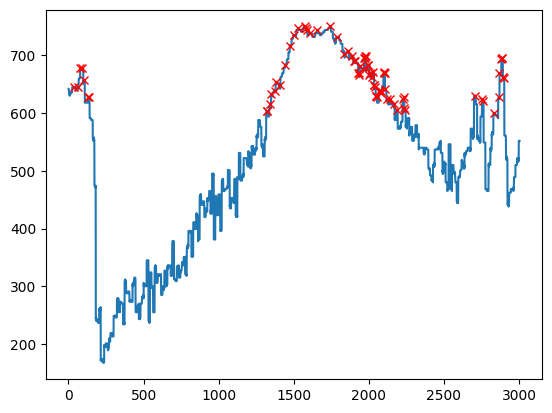

In [ ]:
plt.plot(imdatax,imdataAVG)
plt.plot(peaks, imdataAVG[peaks], "xr")

plt.show()

In [ ]:
print(peaks)

[  34   60   78   92  100  129  135 1319 1325 1345 1349 1372 1383 1408
 1444 1473 1503 1530 1572 1585 1588 1610 1658 1742 1791 1836 1860 1886
 1899 1911 1931 1933 1935 1943 1971 1973 1976 1979 1981 1993 1998 2004
 2006 2020 2028 2035 2037 2041 2047 2049 2052 2069 2075 2082 2098 2102
 2106 2108 2123 2141 2171 2187 2228 2235 2237 2244 2705 2754 2760 2834
 2864 2870 2882 2884 2886 2897 2900]


In [ ]:
print(imdatax[peaks[0]])

35.0


In [ ]:
from scipy.optimize import fsolve

In [ ]:
def func(p):
    return [300*p[0]+p[1]-620,
            550*p[0]+p[1]-750]

params = fsolve(func, [1, 1])

print(params[0])
print(params[1])

0.5200000000000001
463.99999999999994


In [ ]:
300*params[0]+params[1]

620.0

In [ ]:
550*params[0]+params[1]

750.0

In [ ]:
imdataxInWavelength = imdatax*params[0]+params[1]

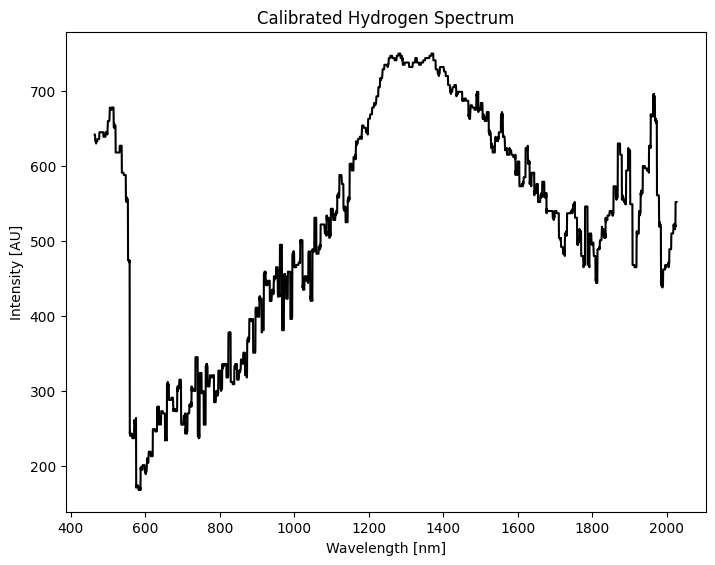

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdataxInWavelength,imdataAVG, color='k', label='PretendData')


ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Intensity [AU]')
ax.set_title('Crater on Northern Plains')
plt.show()